Example notebook to recreate Fig. 4 ($\Delta V$ versus $\Delta \phi$ between DESI EDR and SDSS MaNGA) for the EDR TF paper.

In [5]:
import numpy as np

from astropy.io import fits

import matplotlib.pyplot as plt

# Data

In [3]:
hdul = fits.open('fig4_data.fits')

gals = hdul['SCATTER'].data
hist = hdul['HIST'].data

hdul.close()

In [6]:
# Recreate bin edges of histogram
bin_edges = np.zeros(len(hist) + 1)
bin_edges[:-1] = hist['BIN_EDGE']
bin_edges[-1] = hist['BIN_EDGE'][-1] + (hist['BIN_EDGE'][1] - hist['BIN_EDGE'][0])

# Plot

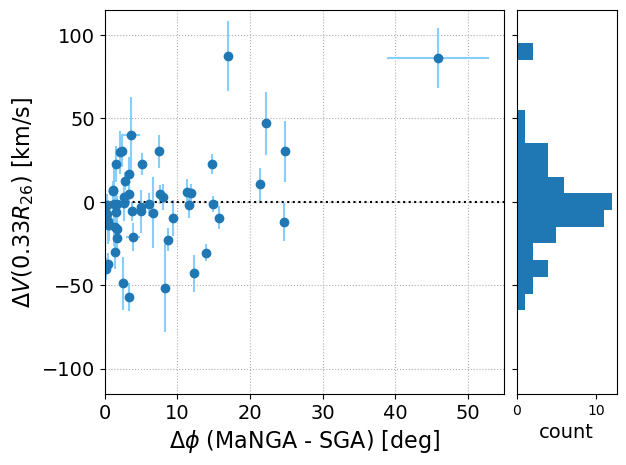

In [9]:
fig = plt.figure()

gs = fig.add_gridspec(1, 2, width_ratios=(4, 1), left=0.15, right=0.95, bottom=0.15, top=0.95, wspace=0.05)

ax = fig.add_subplot(gs[0, 0])
ax.errorbar(gals['DELTA_PHI'], gals['DELTA_V'],
            xerr=gals['DELTA_PHI_ERR'], 
            yerr=gals['DELTA_V_ERR'], 
            fmt='o', 
            ecolor='lightskyblue')
ax.hlines(0, 0., 90., linestyles='dotted', colors='k')

ax.grid(ls=':')

ax.set_xlim(0, 55)
ax.set_ylim(-115, 115)

plt.tick_params(axis='both', which='major', labelsize=14)

ax.set_xlabel('$\Delta \phi$ (MaNGA - SGA) [deg]', fontsize=16)
ax.set_ylabel('$\Delta V(0.33R_{26})$ [km/s]', fontsize=16)


ax_histy = fig.add_subplot(gs[0, 1], sharey=ax)
ax_histy.hist(hist['BIN_EDGE'],
              bin_edges, 
              weights=hist['N'], 
              orientation='horizontal')

ax_histy.tick_params(axis='y', labelleft=False)

ax_histy.set_xlabel('count', fontsize=14);